# Hypothesis Testing Lab - Inferential Statistics (MDSC-102)
*By Saideva Sathvik, I MSc. Data Science And Computing, SSSIHL*

## 1. One Sample t-test

*The one-sample 𝑡-test is used to determine whether a sample comes from a population with a specific mean.*

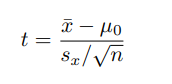

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = [1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]

xb = np.mean(x)

h0 = 1.75

s = np.std(x, ddof=1)
n = len(x)

tobs = (xb - h0)/(s/np.sqrt(n))

print(tobs)

2.3968766311585883


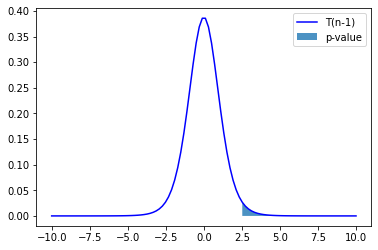

In [6]:
tvalues = np.linspace(-10, 10, 100)

plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")

upper_tval_tvalues = tvalues[tvalues > tobs]

plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value")

plt.legend()

plt.show()

## 2. Two sample (Student) 𝑡-test: compare two means

*The two-sample 𝑡-test is used to determine if two population means are equal. There are several variations on this test. If data are paired use the one-sample 𝑡-test of the difference. The variances of the two samples may be assumed to be equal or unequal.*


*If we assume equal variance, The 𝑡 statistic, that is used to test whether the means are different is:*


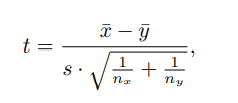

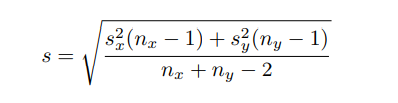

In [15]:
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87, 1.66, 1.71, 1.73,
                   1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])

grp = np.array(["M"] * 10 + ["F"] * 10)

print(grp)


statistic, pval = (stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True))

print("\n P-Value = ",pval)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F'
 'F' 'F']

 P-Value =  0.00228208937112721


## Chi-square, 𝜒2(categorial ~ categorial)

*Computes the chi-square, 𝜒2, statistic and 𝑝-value for the hypothesis test of independence of frequencies in the observed contingency table (cross-table). The observed frequencies are tested against an expected contingency table
obtained by computing expected frequencies based on the marginal sums under the assumption of independence*

In [16]:
import pandas as pd

In [17]:
canalar_tumor = np.array([1] * 10 + [0] * 5)

meta = np.array([1] * 8 + [0] * 6 + [1])

In [18]:
crosstab = pd.crosstab(canalar_tumor, meta, rownames=['canalar_tumor'], colnames=['meta'])
print("Observed table:")
print("---------------")
print(crosstab)
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
meta           0  1
canalar_tumor      
0              4  1
1              2  8
Statistics:
-----------
Chi2 = 2.812500, pval = 0.093533
Expected table:
---------------
[[2. 3.]
 [4. 6.]]


In [22]:
meta_marg = crosstab.sum(axis=0)
meta_freq = meta_marg / meta_marg.sum()
canalar_tumor_marg = crosstab.sum(axis=1)
canalar_tumor_freq = canalar_tumor_marg / canalar_tumor_marg.sum()
print('Canalar tumor frequencies: \nYes: %.2f' % canalar_tumor_freq[0], 'No: %.2f' %canalar_tumor_freq[1])
print('Metastasis frequency? Yes: %.2f' % meta_freq[0], 'No: %.2f' % meta_freq[1])
print('Expected frequencies:')
print(np.outer(canalar_tumor_freq, meta_freq))
print('Expected cross-table (frequencies * N): ')
print(np.outer(canalar_tumor_freq, meta_freq) * len(canalar_tumor))

Canalar tumor frequencies: 
Yes: 0.33 No: 0.67
Metastasis frequency? Yes: 0.40 No: 0.60
Expected frequencies:
[[0.13333333 0.2       ]
 [0.26666667 0.4       ]]
Expected cross-table (frequencies * N): 
[[2. 3.]
 [4. 6.]]
